Finds and graphs "useable" data from the dyed rats experements.

In [1]:
import sys
sys.path.append('../../')

In [2]:
from src.classes.vid_loader import VidLoader
from src.classes.pred_loader import PredLoader
import matplotlib.pyplot as plt
import numpy as np

In [3]:
vid = VidLoader('dyed')

these are how many videos there are in PairedTestingSessions/
There are 1114 single instance videos
There are 912 multi instance videos
There are 128 videos from RY color pair
There are 169 videos from YB color pair
There are 171 videos from GB color pair
There are 178 videos from GY color pair
There are 99 videos from RB color pair
There are 167 videos from RG color pair
There are 912 multi instance videos

these are how many videos there are in Training_COOPERATION/
There are 184 multi instance videos
There are 16 videos from GY color pair
There are 58 videos from YB color pair
There are 11 videos from GB color pair
There are 21 videos from RG color pair
There are 32 videos from RB color pair
There are 46 videos from RY color pair
There are 184 multi instance videos


In [4]:
preds = PredLoader('dyed_preds_df.csv')

total of cooperation trials:
476
test cooperation trials:
292
train cooperation trials:
184


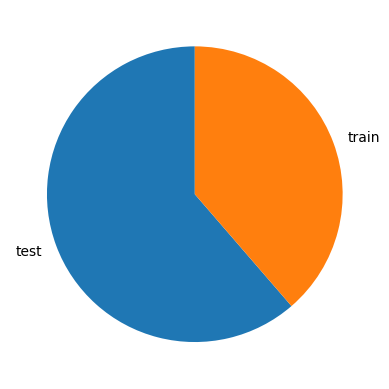

In [5]:
print('total of cooperation trials:')
coop_df = preds.df[preds.df['trial type'] == 'coop']
print(coop_df.shape[0])

print('test cooperation trials:')
test_df = coop_df[(coop_df['test/train'] == 'test')]
print(test_df.shape[0])

print('train cooperation trials:')
train_df = coop_df[(coop_df['test/train'] == 'train')]
print(train_df.shape[0])

fig, ax = plt.subplots()
_ = ax.pie([test_df.shape[0], train_df.shape[0]], labels=['test', 'train'], startangle=90)

useability of test cooperation trials:
[158, 36, 45, 2, 12]


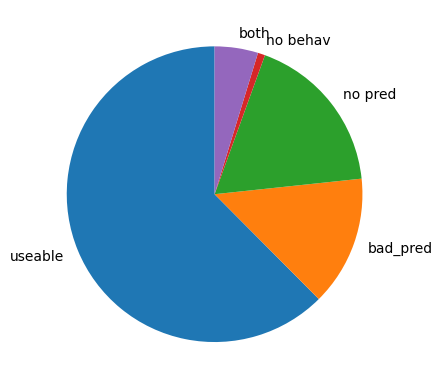

In [6]:
print('useability of test cooperation trials:')
useable = test_df[(test_df['correct'] == True) & (test_df['levers'] == True) & (test_df['mags'] == True)].shape[0]
useable = test_df[(test_df['initial nan'] < .2) & (test_df['correct'] == True) & (test_df['levers'] == True) & (test_df['mags'] == True)].shape[0]
bad_pred = test_df[(test_df['pred'] == True) & (test_df['correct'] == False) & (test_df['levers'] == True) & (test_df['mags'] == True)].shape[0]
no_pred = test_df[(test_df['pred'] == False) & (test_df['correct'] == False) & (test_df['levers'] == True) & (test_df['mags'] == True)].shape[0]
no_behav = test_df[(test_df['correct'] == True) & ((test_df['levers'] == False) | (test_df['mags'] == False))].shape[0]
both = test_df[(test_df['correct'] == False) & ((test_df['levers'] == False) | (test_df['mags'] == False))].shape[0]
fig, ax = plt.subplots()
_ = ax.pie([useable, bad_pred, no_pred, no_behav, both], labels=['useable', 'bad_pred', 'no pred', 'no behav', 'both'], startangle=90)
print([useable, bad_pred, no_pred, no_behav, both])

useability of training cooperation trials:
[91, 38, 11, 18, 5]


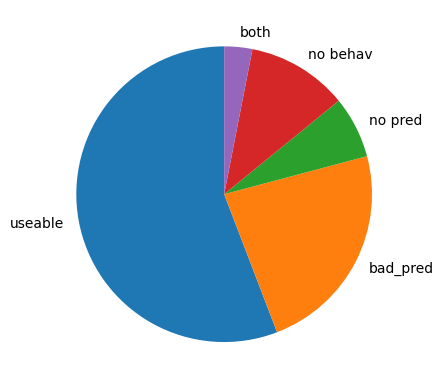

In [7]:
print('useability of training cooperation trials:')
useable = train_df[(train_df['correct'] == True) & (train_df['levers'] == True) & (train_df['mags'] == True)].shape[0]
useable = train_df[(train_df['initial nan'] < .2) & (train_df['correct'] == True) & (train_df['levers'] == True) & (train_df['mags'] == True)].shape[0]
bad_pred = train_df[(train_df['pred'] == True) & (train_df['correct'] == False) & (train_df['levers'] == True) & (train_df['mags'] == True)].shape[0]
no_pred = train_df[(train_df['pred'] == False) & (train_df['correct'] == False) & (train_df['levers'] == True) & (train_df['mags'] == True)].shape[0]
no_behav = train_df[(train_df['correct'] == True) & ((train_df['levers'] == False) | (train_df['mags'] == False))].shape[0]
both = train_df[(train_df['correct'] == False) & ((train_df['levers'] == False) | (train_df['mags'] == False))].shape[0]
fig, ax = plt.subplots()
_ = ax.pie([useable, bad_pred, no_pred, no_behav, both], labels=['useable', 'bad_pred', 'no pred', 'no behav', 'both'], startangle=90)
print([useable, bad_pred, no_pred, no_behav, both])

familiarity of useable test cooperation trials:
[65, 80, 52]


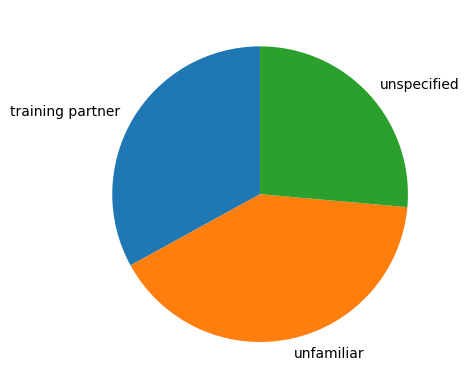

In [8]:
print('familiarity of useable test cooperation trials:')
useable = test_df[(test_df['correct'] == True) & (test_df['levers'] == True) & (test_df['mags'] == True)]
us_TP = useable[useable['familiarity'] == 'TP'].shape[0]
us_UF = useable[useable['familiarity'] == 'UF'].shape[0]
us_us = useable[(useable['familiarity'] != 'TP') & (useable['familiarity'] != 'UF')].shape[0]
fig, ax = plt.subplots()
_ = ax.pie([us_TP, us_UF, us_us], labels=['training partner', 'unfamiliar', 'unspecified'], startangle=90)
print([us_TP, us_UF, us_us])

useability of 
[58, 46, 188]


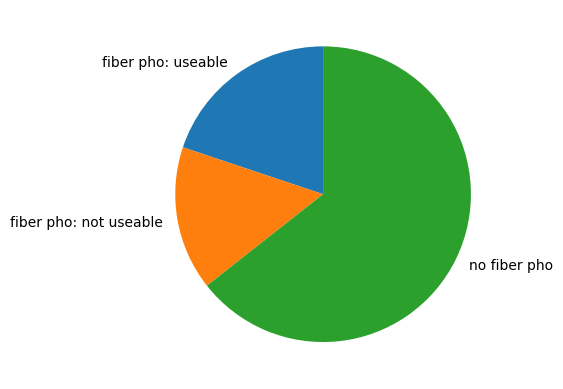

In [9]:
useable = test_df[(test_df['correct'] == True) & (test_df['levers'] == True) & (test_df['mags'] == True)]
fiber_pho = test_df[(test_df['fiber pho'] == True)].shape[0]
u_fiber_pho = useable[(useable['fiber pho'] == True)].shape[0]
no_fiber_pho = test_df[(test_df['fiber pho'] == False)].shape[0]
fig, ax = plt.subplots()
_ = ax.pie([u_fiber_pho, fiber_pho - u_fiber_pho, no_fiber_pho], labels=['fiber pho: useable', 'fiber pho: not useable', 'no fiber pho'], startangle=90)
print("useability of ")
print([u_fiber_pho, fiber_pho - u_fiber_pho, no_fiber_pho])

useability of fiber-pho trials:
[58, 17, 21, 1, 7]


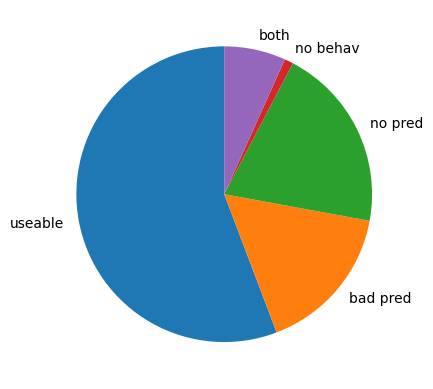

In [10]:
# useable = test_df[(test_df['correct'] == True) & (test_df['levers'] == True) & (test_df['mags'] == True)]
fiber_pho = test_df[(test_df['fiber pho'] == True)]

print('useability of fiber-pho trials:')
useable = fiber_pho[(fiber_pho['correct'] == True) & (fiber_pho['levers'] == True) & (fiber_pho['mags'] == True)].shape[0]
bad_pred = fiber_pho[(fiber_pho['pred'] == True) & (fiber_pho['correct'] == False) & (fiber_pho['levers'] == True) & (fiber_pho['mags'] == True)].shape[0]
no_pred = fiber_pho[(fiber_pho['pred'] == False) & (fiber_pho['correct'] == False) & (fiber_pho['levers'] == True) & (fiber_pho['mags'] == True)].shape[0]
no_behav = fiber_pho[(fiber_pho['correct'] == True) & ((fiber_pho['levers'] == False) | (fiber_pho['mags'] == False))].shape[0]
both = fiber_pho[(fiber_pho['correct'] == False) & ((fiber_pho['levers'] == False) | (fiber_pho['mags'] == False))].shape[0]
fig, ax = plt.subplots()
_ = ax.pie([useable, bad_pred, no_pred, no_behav, both], labels=['useable', 'bad pred', 'no pred', 'no behav', 'both'], startangle=90)
print([useable, bad_pred, no_pred, no_behav, both])

In [14]:
fiber_pho = fiber_pho[fiber_pho['vid'].str.contains('KL')]
fiber_pho

,vid,session,single/multi,test/train,pred,color pair,initial nan,vel nan,correct,final nan,levers,mags,trial type,familiarity,fiber pho
1753,090324_Cam1_TrNum14_Coop_KL002B-KL002Y,090324_FiberPho_KL002B-KL003_TimeOut,multi,test,True,YB,0.047499,0.049179,True,0.000299,True,True,coop,TP,True
1755,090324_Cam1_TrNum12_Coop_KL002B-KL003G,090324_FiberPho_KL002B-KL003_TimeOut,multi,test,False,GB,-1.000000,-1.000000,False,-1.000000,True,True,coop,UF,True
1757,090324_Cam1_TrNum10_Coop_KL002B-KL003G,090324_FiberPho_KL002B-KL003_TimeOut,multi,test,False,GB,-1.000000,-1.000000,False,-1.000000,True,True,coop,UF,True
1761,090924_Cam1_TrNum10_Coop_KL007G-KL002Y,090924_FiberPho_KL007G-KL002_TimeOut,multi,test,True,GY,0.121554,0.128191,True,0.001136,True,True,coop,UF,True
1762,090924_Cam1_TrNum14_Coop_KL007G-KL002B,090924_FiberPho_KL007G-KL002_TimeOut,multi,test,False,GB,-1.000000,-1.000000,False,-1.000000,True,True,coop,UF,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,100324_Cam1_TrNum6_Coop_KL005Y-KL005B,100324_FiberPho_KL005Y_TimeOut_Opaque,multi,test,True,YB,0.069104,0.079044,True,0.001915,True,True,coop,TP,True
1986,100324_Cam2_TrNum6_Coop_KL006G-KL006R,100324_FiberPho_KL006G_TimeOut_Opaque,multi,test,True,RG,0.095442,0.103961,True,0.000739,True,True,coop,TP,True
1998,101824_Cam2_TrNum5_Coop_KL006G-HF001R,101824_FiberPho_HF006G_HF001R_TimeOut,multi,test,True,RG,0.509456,0.522460,False,-1.000000,True,True,coop,UF,True
1999,101824_Cam2_TrNum4_Coop_KL006G-KL008Y,101824_FiberPho_HF006G_HF001R_TimeOut,multi,test,True,GY,0.601449,0.615440,False,-1.000000,True,True,coop,TP,True


In [21]:
has_pred = fiber_pho[(fiber_pho['pred'] == True)]['initial nan']

Text(0, 0.5, 'num of videos')

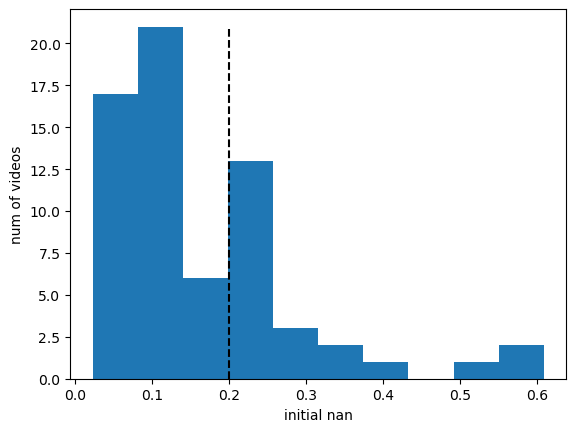

In [40]:
plt.vlines(0.2, 0, 21, 'k', linestyle='dashed')
plt.hist(has_pred)
plt.xlabel("initial nan")
plt.ylabel("num of videos")

In [38]:
fiber_pho.shape
57 + 7 + 21 + 1 + 5
np.sum([44, 20, 21, 1, 5])

np.int64(91)

useability of fiber-pho trials:
[44, 20, 21, 1, 5]


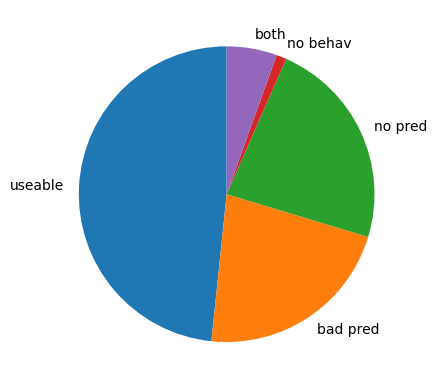

In [37]:
# USEABLE FIBER PHO FROM THE KL COHORTS!!
# fiber_pho = test_df[(test_df['fiber pho'] == True)]

print('useability of fiber-pho trials:')
useable = fiber_pho[(fiber_pho['initial nan'] <= 0.2) & (fiber_pho['initial nan'] != -1) & (fiber_pho['levers'] == True) & (fiber_pho['mags'] == True)].shape[0]
# useable = fiber_pho[(fiber_pho['correct'] == True) & (fiber_pho['levers'] == True) & (fiber_pho['mags'] == True)].shape[0]
# bad_pred = fiber_pho[(fiber_pho['pred'] == True) & (fiber_pho['correct'] == False) & (fiber_pho['levers'] == True) & (fiber_pho['mags'] == True)].shape[0]
bad_pred = fiber_pho[(fiber_pho['pred'] == True) & (fiber_pho['initial nan'] > 0.2) & (fiber_pho['levers'] == True) & (fiber_pho['mags'] == True)].shape[0]
no_pred = fiber_pho[(fiber_pho['pred'] == False) & (fiber_pho['correct'] == False) & (fiber_pho['levers'] == True) & (fiber_pho['mags'] == True)].shape[0]
no_behav = fiber_pho[(fiber_pho['correct'] == True) & ((fiber_pho['levers'] == False) | (fiber_pho['mags'] == False))].shape[0]
both = fiber_pho[(fiber_pho['correct'] == False) & ((fiber_pho['levers'] == False) | (fiber_pho['mags'] == False))].shape[0]
fig, ax = plt.subplots()
_ = ax.pie([useable, bad_pred, no_pred, no_behav, both], labels=['useable', 'bad pred', 'no pred', 'no behav', 'both'], startangle=90)
print([useable, bad_pred, no_pred, no_behav, both])

In [12]:
# useable = test_df[(test_df['correct'] == True) & (test_df['levers'] == True) & (test_df['mags'] == True)]
fiber_pho = test_df[(test_df['fiber pho'] == True)]

useable = fiber_pho[(fiber_pho['correct'] == True) & (fiber_pho['levers'] == True) & (fiber_pho['mags'] == True)]

bad_pred = fiber_pho[(fiber_pho['pred'] == True) & (fiber_pho['correct'] == False) & (fiber_pho['levers'] == True) & (fiber_pho['mags'] == True)]


no_pred = fiber_pho[(fiber_pho['pred'] == False) & (fiber_pho['correct'] == False) & (fiber_pho['levers'] == True) & (fiber_pho['mags'] == True)]

no_behav = fiber_pho[(fiber_pho['correct'] == True) & ((fiber_pho['levers'] == False) | (fiber_pho['mags'] == False))]
both = fiber_pho[(fiber_pho['correct'] == False) & ((fiber_pho['levers'] == False) | (fiber_pho['mags'] == False))]

In [ ]:
# all 21 of the no pred files are from the GB pair
# the 17 bad pred files are below...
# from both there are 3 GY files that we might be able to get!
# from no behav there is 1 YB file that we might be able to get

In [28]:
bad_pred[bad_pred['color pair'] == 'GY'].shape[0], bad_pred[bad_pred['color pair'] == 'RY'].shape[0], bad_pred[bad_pred['color pair'] == 'YB'].shape[0], bad_pred[bad_pred['color pair'] == 'RG'].shape[0]

(6, 5, 4, 2)

In [21]:
bad_pred

,vid,session,single/multi,test/train,pred,color pair,initial nan,vel nan,correct,final nan,levers,mags,trial type,familiarity,fiber pho
1789,091124_Cam1_TrNum10_Coop_KL002Y-KL004R,091124_FiberPho_KL002Y-KL005_TimeOut,multi,test,True,RY,0.303413,0.350183,False,-1.0,True,True,coop,UF,True
1797,091124_Cam2_TrNum8_Coop_KL007Y-KL004R,091124_FiberPho_KL007Y-KL004_TimeOut,multi,test,True,RY,0.336403,0.371800,False,-1.0,True,True,coop,UF,True
1863,091824_Cam2_TrNum14_Coop_KL008G-KL001Y,091824_FiberPho_KL008G-KL001_TimeOut,multi,test,True,GY,0.302106,0.327665,False,-1.0,True,True,coop,UF,True
1955,100124_Cam1_TrNum15_Coop_KL008G-KL006R,100124_FiberPho_KL008G_KL002_2X_TimeOut,multi,test,True,RG,0.322378,0.329199,False,-1.0,True,True,coop,UF,True
1964,100224_Cam2_TrNum8_Coop_KL002Y-KL006R,100224_FiberPho_KL002Y-KL003_TimeOut,multi,test,True,RY,0.378770,0.415975,False,-1.0,True,True,coop,UF,True
1988,101724_Cam2_TrNum5_Coop_HF004Y-HF001R,101724_FiberPho_HF004Y_HF001R_TimeOut,multi,test,True,RY,0.377070,0.405360,False,-1.0,True,True,coop,UF,True
1990,101724_Cam2_TrNum6_Coop_HF004Y-HF003B,101724_FiberPho_HF004Y_HF001R_TimeOut,multi,test,True,YB,0.325736,0.347727,False,-1.0,True,True,coop,TP,True
1993,101724_Cam1_TrNum6_Coop_HF008Y-HF002G,101724_FiberPho_HF008Y_HF002G_TimeOut,multi,test,True,GY,0.393805,0.416129,False,-1.0,True,True,coop,UF,True
1998,101824_Cam2_TrNum5_Coop_KL006G-HF001R,101824_FiberPho_HF006G_HF001R_TimeOut,multi,test,True,RG,0.509456,0.522460,False,-1.0,True,True,coop,UF,True
1999,101824_Cam2_TrNum4_Coop_KL006G-KL008Y,101824_FiberPho_HF006G_HF001R_TimeOut,multi,test,True,GY,0.601449,0.615440,False,-1.0,True,True,coop,TP,True


In [29]:
both

,vid,session,single/multi,test/train,pred,color pair,initial nan,vel nan,correct,final nan,levers,mags,trial type,familiarity,fiber pho
1895,092524_Cam2_TrNum8_Coop_KL006G-KL002B,092524_FiberPho_KL006G-KL002_2X_TimeOut,multi,test,False,GB,-1.000000,-1.000000,False,-1.0,True,False,coop,UF,True
1923,092724_Cam1_TrNum15_Coop_KL008G-KL008B,092724_FiberPho_KL008G_KL002_TimeOut,multi,test,False,GB,-1.000000,-1.000000,False,-1.0,True,False,coop,TP,True
1949,100124_Cam2_TrNum15_Coop_KL004G-KL005B,100124_FiberPho_KL004G-KL001_2X_TimeOut,multi,test,False,GB,-1.000000,-1.000000,False,-1.0,False,False,coop,UF,True
1971,100224_Cam1_TrNum8_Coop_KL006G-KL008B,100224_FiberPho_KL006G-KL008_TimeOut,multi,test,False,GB,-1.000000,-1.000000,False,-1.0,False,False,coop,UF,True
1992,101724_Cam1_TrNum7_Coop_HF008Y-HF006G,101724_FiberPho_HF008Y_HF002G_TimeOut,multi,test,True,GY,0.578299,0.598225,False,-1.0,True,False,coop,TP,True
1994,101724_Cam1_TrNum4_Coop_HF008Y-HF006G,101724_FiberPho_HF008Y_HF002G_TimeOut,multi,test,True,GY,0.443932,0.460793,False,-1.0,True,False,coop,TP,True
2000,101824_Cam2_TrNum7_Coop_KL006G-KL008Y,101824_FiberPho_HF006G_HF001R_TimeOut,multi,test,True,GY,0.608958,0.617554,False,-1.0,False,False,coop,TP,True


In [16]:
no_pred.to_csv('GB_fiber_pho_vids.csv', index=False)

In [21]:
check_df = preds.df[((preds.df['levers'] == False) | (preds.df['mags'] == False)) & (preds.df['trial type'] == 'coop')]

In [25]:
check_df

,vid,session,single/multi,test/train,pred,color pair,initial nan,vel nan,correct,final nan,levers,mags,trial type,familiarity,fiber pho
1428,050324_Cam4_TrNum12_Coop_KL001B-KL001Y,050324_KL001_TimeOut_Translucent,multi,test,True,YB,0.419153,0.436394,False,-1.000000,False,False,coop,NaN,False
1429,050324_Cam4_TrNum5_Coop_KL001B-KL001Y,050324_KL001_TimeOut_Translucent,multi,test,True,YB,0.372370,0.398114,False,-1.000000,False,False,coop,NaN,False
1541,051324_Cam1_TrNum7_Coop_EB001R-EB033Y,051324_EB001R-031B-033Y_TimeOut_VEH,multi,test,True,RY,0.275847,0.281242,True,0.010783,True,False,coop,UF,False
1773,091024_Cam2_TrNum8_Coop_KL008G-KL005B,091024_FiberPho_KL007Y-KL002_TimeOut,multi,test,False,GB,-1.000000,-1.000000,False,-1.000000,False,False,coop,NaN,False
1778,091024_Cam2_TrNum12_Coop_KL008G-KL005Y,091024_FiberPho_KL007Y-KL002_TimeOut,multi,test,False,GY,-1.000000,-1.000000,False,-1.000000,False,False,coop,NaN,False
1779,091024_Cam2_TrNum10_Coop_KL008G-KL008B,091024_FiberPho_KL007Y-KL002_TimeOut,multi,test,False,GB,-1.000000,-1.000000,False,-1.000000,False,False,coop,NaN,False
1884,092424_Cam2_TrNum12_Coop_KL005Y-KL008B,092424_FiberPho_KL005Y-KL008_TimeOut,multi,test,True,YB,0.134125,0.143235,True,0.003409,False,False,coop,UF,True
1895,092524_Cam2_TrNum8_Coop_KL006G-KL002B,092524_FiberPho_KL006G-KL002_2X_TimeOut,multi,test,False,GB,-1.000000,-1.000000,False,-1.000000,True,False,coop,UF,True
1923,092724_Cam1_TrNum15_Coop_KL008G-KL008B,092724_FiberPho_KL008G_KL002_TimeOut,multi,test,False,GB,-1.000000,-1.000000,False,-1.000000,True,False,coop,TP,True
1949,100124_Cam2_TrNum15_Coop_KL004G-KL005B,100124_FiberPho_KL004G-KL001_2X_TimeOut,multi,test,False,GB,-1.000000,-1.000000,False,-1.000000,False,False,coop,UF,True
